# Analysis and Comparison of Regression Models


# Introduction
This report briefly overviews the Medical cost personal dataset, as well as the regression models used to predict the cost of insurance for each sample. It also addresses the effect of feature selection on these models. It calculates the Root Mean Squared Error and the R2 of each regressor in order to make a comparison. By the end of the report, a synthetic dataset was generated so that we can see how these models would perform on noisy data and how the regression function would look like.

# Importing Required Libraries 
The following library might need to be installed:

yellowbrick using: pip install yellowbrick

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from yellowbrick.regressor import prediction_error

D:\School\python\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data overview
 

In [2]:
#read data
data= pd.read_csv('insurance.csv')
data.head()
#data.describe()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


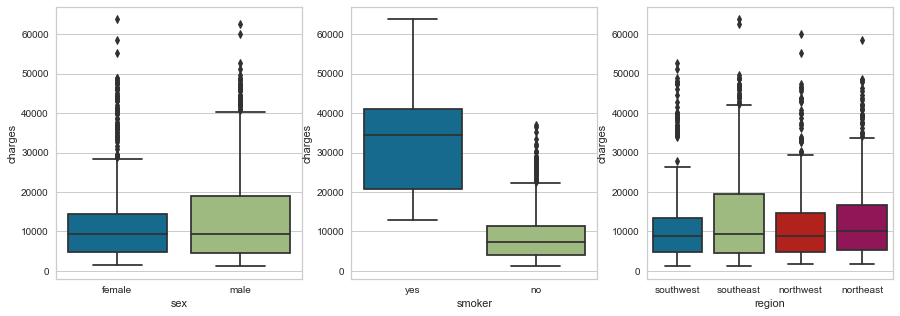

In [3]:
#let's see if charges differ within the categorical variables
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='sex',y='charges',data=data)
plt.subplot(1,3,2)
sns.boxplot(x='smoker',y='charges',data=data)
plt.subplot(1,3,3)
sns.boxplot(x='region',y='charges',data=data)

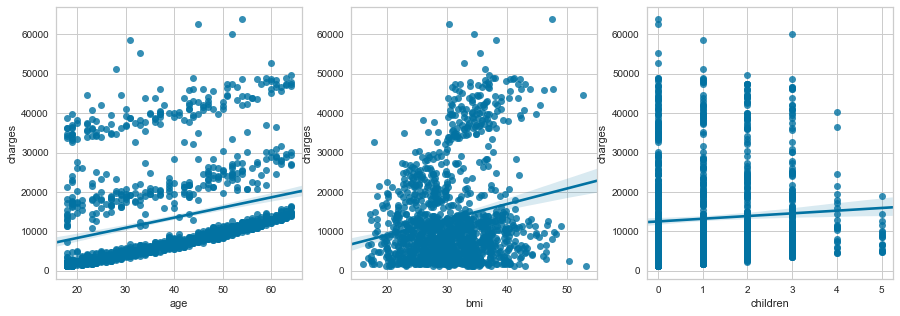

In [4]:
#let's try the non-categorical data
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.regplot(x='age',y='charges',data=data)
plt.subplot(1,3,2)
sns.regplot(x='bmi',y='charges',data=data)
plt.subplot(1,3,3)
sns.regplot(x='children',y='charges',data=data)

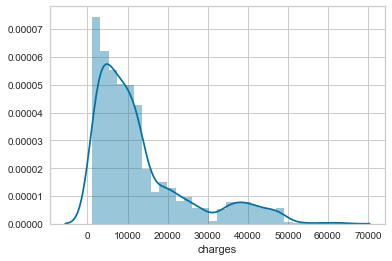

In [79]:
#charges distribution
sns.distplot(data.charges)

We can see most of the dependent variable are distributed between 0 to 15000 and that medical costs are not normally distributed and there are some outliers. 

# Data Preprocessing
Before implementing machine learning algorithms the data should be formatted. Here, I had to encode the categorial values which are the region, sex and smoker. For this purpose I have used LabelEncoder from Sklearn. Moreover, the data was normalized using MinMaxScaler from sklearn. Finally, I have separated the target which is the charges from the dataset and then I split the data into training and testing sets, my testing sets will be 33% of the whole dataset.

In [3]:
#sex
encoder = LabelEncoder()
encoder.fit(data.sex.drop_duplicates()) 
data.sex = encoder.transform(data.sex)
# smoker or not
encoder.fit(data.smoker.drop_duplicates()) 
data.smoker = encoder.transform(data.smoker)
#region
encoder.fit(data.region.drop_duplicates()) 
data.region = encoder.transform(data.region)

In [4]:
#normalize data
scaler = MinMaxScaler()
scaler.fit(data)
scaler.transform(data)
#split targets and features
X = data.drop(['charges'], axis = 1)
y = data.charges
#split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Modeling
To evaluate the models performance we predict value for target variable by using the model parameter for test data set. Then compare the predicted value with actual value in test set. To do this, I have used Root Mean Square Error which follows the formula

##### RMSE = sqrt [(1/n samples) ∑(actual output - predicted output)²]

RMSE best value is clearly 0.

Moreover, I have used R squared (r2) which is a statistical measure of how close data is to the fitted regression line.  R2  is always between 0 to 1 where 0 indicated that model explains none of the variability of the response data around it's mean and 1 indicated that model explains all the variablity of the response data around the mean.

###### R2=1−(SSE/SST)

SSE = Sum of Squared Error 

SST = Sum of Squares Total

##### SSE = Σ (actual output - predicted output)²

##### SST = Σ (actual output - average  of  actual output)²



## Linear Regression
Linear regression is a basic and commonly used type of predictive analysis which usually works on continuous data. In this model we try to find the linear function based on input variables which will help estimate the output variables. It is represented by the equation:

##### y (pred) = β0 +  βiXi + ϵi 

where β0 (intercept) and βi (slope) are the coefficients and ϵ represents the random error component.

The values of β0 and βi must be chosen so that they minimize the error. If sum of squared error (SSE) is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.



### Running Linear Regression
I have used Scikit learn LinearRegression. It takes as input two arrays: the data matrix X and the target values y.
Learning is done as follows:

> from sklearn.linear_model import LinearRegression

> reg = LinearRegression()

> reg.fit(X, y)

After the learning process, the model can then be used to predict ynew for xnew

> reg.predict(xnew)


In [5]:
#build lr model
lr = LinearRegression()
#train model
lr.fit(X_train,y_train)
#predict on train and test sets
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#predicting Cross Validation Score on the test set
cv_lr = cross_val_score(lr, X_test, y_test, cv = 10).mean()
print("CV: ", cv_lr)

#rmse for training and testing 
rmse_train_lr=np.sqrt(mean_squared_error(y_train,lr_train_pred))
rmse_test_lr=np.sqrt(mean_squared_error(y_test,lr_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_lr, rmse_test_lr))

#r2 for training and testing
r2_train_lr = r2_score(y_train,lr_train_pred)
r2_test_lr =r2_score(y_test,lr_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_lr, r2_test_lr))

CV:  0.7187998237842348
RMSE train data: 6106.392, RMSE test data: 5927.227
R2 train data: 0.745, R2 test data: 0.760


### Feature Selection
I have explained the importance of this step in my classification report, we'll see whether it can enhcance the linear regression performance. I have selected the best 4 features (smoker,bmi,age and children) based on their correlation with the output (charges).

In [26]:
#best features based on correlation with target
ft= X.corrwith(y)
X = data.drop(['charges','sex'], axis = 1)
Y = data.charges
#split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.33, random_state=42)


In [27]:
#build lr model
lr = LinearRegression()
#train model
lr.fit(X_train,y_train)
#predict on train and test sets
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

#predicting Cross Validation Score on the test set
cv_lr = cross_val_score(lr, X_test, y_test, cv = 10).mean()
print("CV: ", cv_lr)

#rmse for training and testing 
rmse_train_lr=np.sqrt(mean_squared_error(y_train,lr_train_pred))
rmse_test_lr=np.sqrt(mean_squared_error(y_test,lr_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_lr, rmse_test_lr))

#r2 for training and testing
r2_train_lr = r2_score(y_train,lr_train_pred)
r2_test_lr =r2_score(y_test,lr_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_lr, r2_test_lr))

CV:  0.722195966933037
RMSE train data: 6106.732, RMSE test data: 5923.250
R2 train data: 0.745, R2 test data: 0.761


We can observe a very slight increase in the perfromance thus we will continue with the selected features

## Polynomial Regression
It is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y.
The general equation of a polynomial regression is:

##### y(pred) =  β0  + β1X1 + b2x^2 +....+ bnx^n+ ϵi 



### Running Polynomial Regression
I have used Scikit learn PolynomialFeatures. It takes as input the degree of polynomial features and then it generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. So basicaly, we use it to transform our X and then we train LinearRegression on the genrated X. Here is how we can do the transofrmation:

> from sklearn.preprocessing import PolynomialFeatures

> poly = PolynomialFeatures(degree=2)

> poly.fit_transform(X)


After that we follow the same method of running LinearRegression.


In [30]:
#transform X to poly fearueres of 2nd degree
poly = PolynomialFeatures (degree = 2)
x_poly = poly.fit_transform(X)

#split into train and test using the new X
X_train,X_test,y_train,y_test = train_test_split(x_poly,Y, test_size=0.33, random_state=42)

#build lr model using the new X
plr = LinearRegression().fit(X_train,y_train)

#making predictions on test and train sets
plr_train_pred = plr.predict(X_train)
plr_test_pred = plr.predict(X_test)

# Predicting Cross Validation Score 
cv_plr = cross_val_score(plr, X_test,y_test, cv = 10).mean()
print("CV: ", cv_plr)

#rmse for training and testing 
rmse_train_plr=np.sqrt(mean_squared_error(y_train,plr_train_pred))
rmse_test_plr=np.sqrt(mean_squared_error(y_test,plr_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_plr, rmse_test_plr))

#r2 for training and testing
r2_train_plr = r2_score(y_train,plr_train_pred)
r2_test_plr =r2_score(y_test,plr_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_plr, r2_test_plr))

CV:  0.8200995123153574
RMSE train data: 4833.497, RMSE test data: 4616.889
R2 train data: 0.841, R2 test data: 0.855


## Random Forest
This model was explained in my classification report thus I will not re-explain it again here. However, there is one important parameter difference between Random forest classifier and regressor which is the criterion (the function that measures the quality of the split). In regression, the criterion can be either MSE or MAE which stand for Mean Squared Error and Mean Absolute Error. The MSE was explained before in this report. While MAE follows the equation:

##### MAE= (1/n samples) ∑ |actual output - predicted output|

Here, I have only used mse as criterion since I'm only using RMSE to calculate the models performance.

### Running Random Forest Regressor
RandomForestRegressor takes as input two arrays: the data matrix X and the targets values y. 
Learning is done as follows:

>from sklearn.ensemble import RandomForestRegressor

>reg = RandomForestRegressor()

>reg.fit(X, y)

After the learning process, the model can then be used to predict ynew for xnew

>reg.predict(xnew)

In [31]:
#build random forest regressor model
forest = RandomForestRegressor(max_leaf_nodes=18,random_state=1,n_estimators=500,criterion = 'mse',n_jobs = -1)
#training the model
forest.fit(X_train,y_train)
#predictions on train and test sets
forest_train_pred = forest.predict(X_train)
forest_test_pred = forest.predict(X_test)

#predicting Cross Validation Score on the test set 
cv_forest = cross_val_score(forest, X_test, y_test, cv = 10).mean()
print("CV: ", cv_forest)

#rmse for training and testing 
rmse_train_forest=np.sqrt(mean_squared_error(y_train,forest_train_pred))
rmse_test_forest=np.sqrt(mean_squared_error(y_test,forest_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_forest, rmse_test_forest))

#r2 for training and testing
r2_train_forest= r2_score(y_train,forest_train_pred)
r2_test_forest=r2_score(y_test,forest_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_forest, r2_test_forest))

CV:  0.8328670673652976
RMSE train data: 3899.580, RMSE test data: 4558.008
R2 train data: 0.896, R2 test data: 0.858


## Model Comparision
The models were joined with their RMSE and R2 on training and test sets as well as their cross validation score. The list was then transformed into a pandas dataframe for better visualizing as seen below. Then it is used to plot each of their performances based on cross validation score.

In [32]:
#joining all models with some of their scores in a list
models = [('Linear Regression', rmse_test_lr, r2_train_lr, r2_test_lr, cv_lr),
          ('Polynomial Regression', rmse_test_plr, r2_train_plr, r2_test_plr, cv_plr),
          ('Random Forest Regression', rmse_test_forest, r2_train_forest, r2_test_forest, cv_forest)   
         ]
#transform it to a dataframe
models_scores = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
models_scores

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,5923.250369,0.745456,0.760586,0.722196
1,Polynomial Regression,4616.888848,0.840534,0.854545,0.820100
2,Random Forest Regression,4558.007745,0.896204,0.858231,0.832867


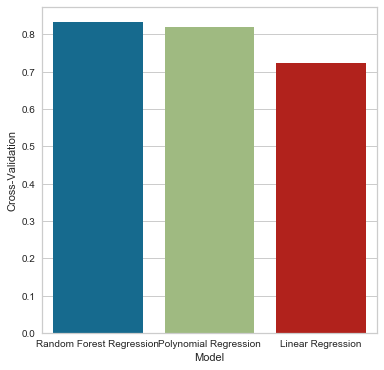

In [33]:
#plot a comparison of these models based on cv score
models_scores.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='Model', y='Cross-Validation', data=models_scores, ax = axe)
axe.set_xlabel('Model')
axe.set_ylabel('Cross-Validation')

plt.show()

We can see the three models have some large RMSE values which might be due to the skewed distribution of the target values. Random forest has the least RMSE and the best r2 scores and cross validation scores followed by polynomial regression while linear regression was the worst of them all.

# Synthetic Dataset Generation and Preprocessing
I have generated a synthetic dataset of 2000 samples with 2 features, only one of them is informative, I have also added some noise using datasets.make_regression from scikit learn. The data points are plotted and then splitted into training and testing sets.

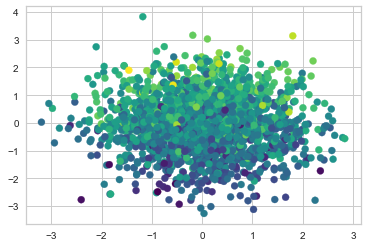

In [89]:
#regression with 2 features
Xs,ys = datasets.make_regression(n_samples=2000, n_features=2, n_informative=1, n_targets=1,
                                 bias=500, effective_rank=None, tail_strength=0.5, noise=50,
                                 shuffle=True, coef=False, random_state=None)
#plot data
plt.scatter(Xs[:,0], Xs[:,1], c = ys ,cmap='viridis') 

#split in train and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(Xs, ys, test_size=0.33, random_state=42)

# Training Regressors and Visualizing their Functions
The same 3 previous models have been applied here (linear regression, polynomial regression and random forest).

### Linear Regression

In [90]:
#build lr model
lr = LinearRegression()
#train model
lr.fit(Xtrain,ytrain)
#predict on train and test sets
lr_train_pred = lr.predict(Xtrain)
lr_test_pred = lr.predict(Xtest)

#predicting Cross Validation Score on Test set
cv_lr = cross_val_score(lr, Xtest, ytest, cv = 10).mean()
print("CV: ", cv_lr)

#rmse for training and testing 
rmse_train_lr=np.sqrt(mean_squared_error(ytrain,lr_train_pred))
rmse_test_lr=np.sqrt(mean_squared_error(ytest,lr_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_lr, rmse_test_lr))

#r2 for training and testing
r2_train_lr = r2_score(ytrain,lr_train_pred)
r2_test_lr =r2_score(ytest,lr_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_lr, r2_test_lr))

CV:  0.3124284922913567
RMSE train data: 49.940, RMSE test data: 51.815
R2 train data: 0.282, R2 test data: 0.328


### Polynomial Regression

In [97]:
#transform X to poly features of 2nd degree
poly = PolynomialFeatures (degree = 2)
x_poly = poly.fit_transform(Xs)

#split into train and test using the new X
X_train,X_test,y_train,y_test = train_test_split(x_poly,ys, test_size=0.33, random_state=42)

#build lr model using the new X
plr = LinearRegression().fit(X_train,y_train)

#making predictions on test and train sets
plr_train_pred = plr.predict(X_train)
plr_test_pred = plr.predict(X_test)

# Predicting Cross Validation Score the Test set results
cv_plr = cross_val_score(plr, Xtest,ytest, cv = 10).mean()
print("CV: ", cv_plr)

#rmse for training and testing 
rmse_train_plr=np.sqrt(mean_squared_error(ytrain,plr_train_pred))
rmse_test_plr=np.sqrt(mean_squared_error(ytest,plr_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_plr, rmse_test_plr))
#r2 for training and testing
r2_train_plr = r2_score(ytrain,plr_train_pred)
r2_test_plr =r2_score(ytest,plr_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_plr, r2_test_plr))

CV:  0.3124284922913567
RMSE train data: 49.933, RMSE test data: 51.820
R2 train data: 0.282, R2 test data: 0.328


### Random Forest Regressor

In [102]:
#build random forest regressor model
forest = RandomForestRegressor(max_leaf_nodes=13,random_state=1,n_estimators=200,criterion = 'mse',n_jobs = -1)
#training the model
forest.fit(Xtrain,ytrain)
#predictions on train and test sets
forest_train_pred = forest.predict(Xtrain)
forest_test_pred = forest.predict(Xtest)

#predicting Cross Validation Score on the test set 
cv_forest = cross_val_score(forest, Xtest, ytest, cv = 10).mean()
print("CV: ", cv_forest)

#rmse for training and testing 
rmse_train_forest=np.sqrt(mean_squared_error(ytrain,forest_train_pred))
rmse_test_forest=np.sqrt(mean_squared_error(ytest,forest_test_pred))
print('RMSE train data: %.3f, RMSE test data: %.3f' % (rmse_train_forest, rmse_test_forest))

#r2 for training and testing
r2_train_forest= r2_score(ytrain,forest_train_pred)
r2_test_forest=r2_score(ytest,forest_test_pred)
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_train_forest, r2_test_forest))

CV:  0.2632801789263541
RMSE train data: 48.156, RMSE test data: 52.523
R2 train data: 0.332, R2 test data: 0.310


## Model Comparison
In this comparison, the only difference is that we're visualizing the models regression functions using prediction_error from yellowbrick.regressor. In order for it to work it should be installed using:

$ pip install yellowbrick

In [103]:
#joining all models with some of their scores in a list
models = [('Linear Regression', rmse_test_lr, r2_train_lr, r2_test_lr, cv_lr),
          ('Polynomial Regression', rmse_test_plr, r2_train_plr, r2_test_plr, cv_plr),
          ('Random Forest Regression', rmse_test_forest, r2_train_forest, r2_test_forest, cv_forest)   
         ]
#transform it to a dataframe
models_scores = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
models_scores

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,51.814638,0.281625,0.328415,0.312428
1,Polynomial Regression,51.819535,0.281830,0.328288,0.312428
2,Random Forest Regression,52.522683,0.332051,0.309935,0.263280


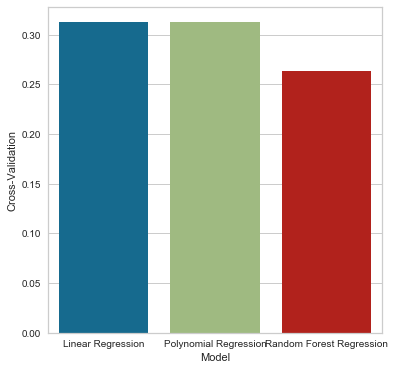

In [104]:
#plot a comparison of these models based on cv score
models_scores.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(6,6))
sns.barplot(x='Model', y='Cross-Validation', data=models_scores, ax = axe)
axe.set_xlabel('Model')
axe.set_ylabel('Cross-Validation')

plt.show()

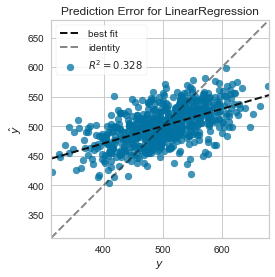

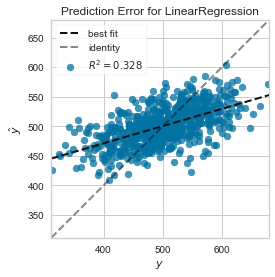

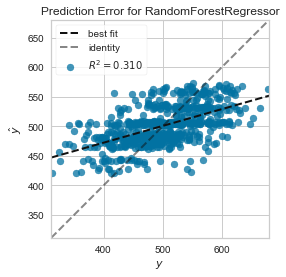

In [106]:
# Instantiate visualizer of linear reg
plt.figure()
visualizer1 = prediction_error(lr, Xtrain, ytrain, Xtest, ytest)
visualizer1.show()
#instantiate visualizer of plr
visualizer2 = prediction_error(plr, X_train, y_train, X_test, y_test)
visualizer2.show()
#Instantiate visualizer of rf
visualizer3 = prediction_error(forest, Xtrain, ytrain, Xtest, ytest)
visualizer3.show() 

From the above functions we can see that three models poorly fit the data. Both linear regression and polynomial regression of the 2nd degree have almost the same scores which are better than the scores of Random forest.

# Summary
Medical costs dataset was kind of noisy with some un-informative features. The models used here are linear regression, polynomial regression and random forest. Linear regression performed the worst while polynomial regression and random forest performed almost the same with at least a 10% increase in their cross validation score of linear regression. Feature selection here has increased the performance of only 0.003 based on cross validation, also RMSE was slightly decreased. It might have been useful in this case to create new features based on the existing ones to increase the performance. Moreover, since the target values distribution is skewed, it could be useful to remove the outliers since most regressors are sensitive to that. 

The same 3 models were applied on a nosiy synthetic dataset with only one informative feature, linear and polynomial regression showed the exact same results while random forest performed worse. The 3 models were very poorly fitting the data points which shows the impact of noisy data on them.